In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
project_data = pd.read_csv('./project_data_collection.csv')
#Documents/GitHub/motion_capture/data/project_data_collection.ods

#first few rows
print(project_data.head(7))

  participant  age  rows                ram               lam  \
0          P1   30   6585  111,064965853659  110,211628463907   
1          P2   24   5855  100,300151515152  98,1001138975967   
2          P3   24   6118  93,5847862844702  99,0917146492185   
3          P4   27   6090  88,9899033684927  92,8538193943763   
4          P5   27   4817  97,3477153153153  95,7412116925978   
5          P6   30   5716  95,5076518489379  91,2515652003142   
6          P7   41   7588  105,303638086906  107,696380358112   

   exercise_Rdist_traveled   exercise_Ldist_traveled   
0                   2314350                   2566894  
1                   2608961                   3404765  
2                   3056802                   2711916  
3                   4812481                   3996350  
4                   3269015                   4037172  
5                   2869954                   2700990  
6                   3284535                   2657107  


In [38]:
project_data.dtypes

participant                  object
age                           int64
rows                          int64
ram                         float64
lam                         float64
exercise_Rdist_traveled       int64
exercise_Ldist_traveled       int64
dtype: object

C:\Users\faufr\AppData\Local\Temp\ipykernel_19152\3009241967.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}°' for y in plt.gca().get_yticks()])


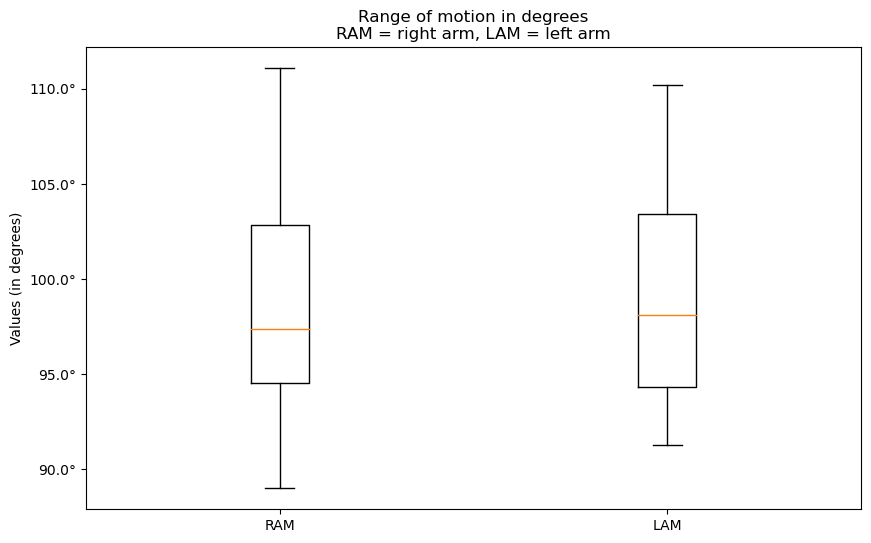

In [61]:
#remove if info above = string

#project_data['ram'] = project_data['ram'].str.replace(',', '.').astype(float)
#project_data['lam'] = project_data['lam'].str.replace(',', '.').astype(float)

# Saving the modified dataframe to a new variable data_new
data_new = project_data

# Creating the boxplot with the modified dataframe
plt.figure(figsize=(10, 6))
plt.boxplot([data_new['ram'], data_new['lam']], labels=['RAM', 'LAM'])
plt.style.use('default')
plt.title('Range of motion in degrees\nRAM = right arm, LAM = left arm')
plt.gca().set_yticklabels([f'{y}°' for y in plt.gca().get_yticks()])
plt.ylabel('Values (in degrees)')
plt.show()

C:\Users\faufr\AppData\Local\Temp\ipykernel_19152\1726657745.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}°' for y in plt.gca().get_yticks()])


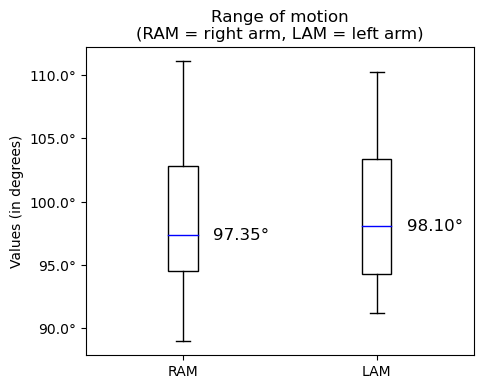

In [84]:
# Assuming data_new is your DataFrame and it has the columns 'ram' and 'lam'
# Calculate the medians
median_ram = data_new['ram'].median()
median_lam = data_new['lam'].median()

# Creating the boxplot
plt.figure(figsize=(5, 4))
boxplots = plt.boxplot([data_new['ram'], data_new['lam']], labels=['RAM', 'LAM'], patch_artist=True)

# Change the box color to transparent
for box in boxplots['boxes']:
    box.set_facecolor('none')

# Change the median line color to blue
for median in boxplots['medians']:
    median.set_color('blue')
    
plt.style.use('default')
plt.title('Range of motion\n(RAM = right arm, LAM = left arm)')
plt.gca().set_yticklabels([f'{y}°' for y in plt.gca().get_yticks()])
plt.ylabel('Values (in degrees)')

# Annotate the medians on the plot
plt.text(1 + 0.3, median_ram, f'{median_ram:.2f}°', verticalalignment='center', horizontalalignment='center', color='black', fontsize=12)
plt.text(2 + 0.3, median_lam, f'{median_lam:.2f}°', verticalalignment='center', horizontalalignment='center', color='black', fontsize=12)

plt.show()


In [63]:
print(project_data.columns)

Index(['participant', 'age', 'rows ', 'ram', 'lam', 'exercise_Rdist_traveled ',
       'exercise_Ldist_traveled '],
      dtype='object')


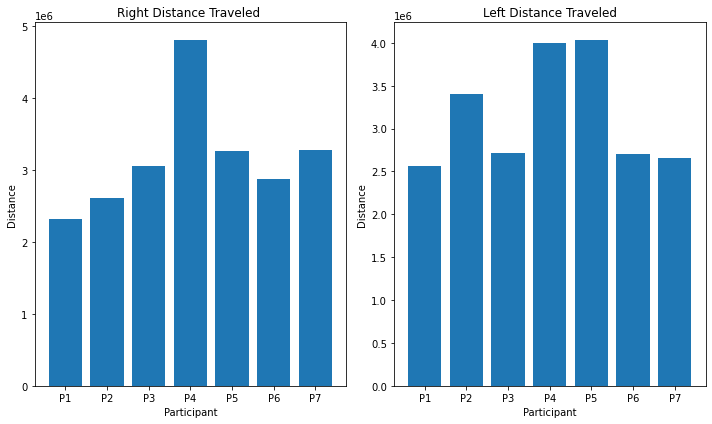

In [12]:
# Convert 'exercise_Rdist_traveled' and 'exercise_Ldist_traveled' to numeric if they are not already
project_data['exercise_Rdist_traveled '] = pd.to_numeric(project_data['exercise_Rdist_traveled '], errors='coerce')
project_data['exercise_Ldist_traveled '] = pd.to_numeric(project_data['exercise_Ldist_traveled '], errors='coerce')

# Creating two separate bar plots
plt.figure(figsize=(10, 6))

# Bar plot for right distance traveled
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(project_data['participant'], project_data['exercise_Rdist_traveled '])
plt.title('Right Distance Traveled ')
plt.xlabel('Participant')
plt.ylabel('Distance')

# Bar plot for left distance traveled
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(project_data['participant'], project_data['exercise_Ldist_traveled '])
plt.title('Left Distance Traveled')
plt.xlabel('Participant')
plt.ylabel('Distance')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



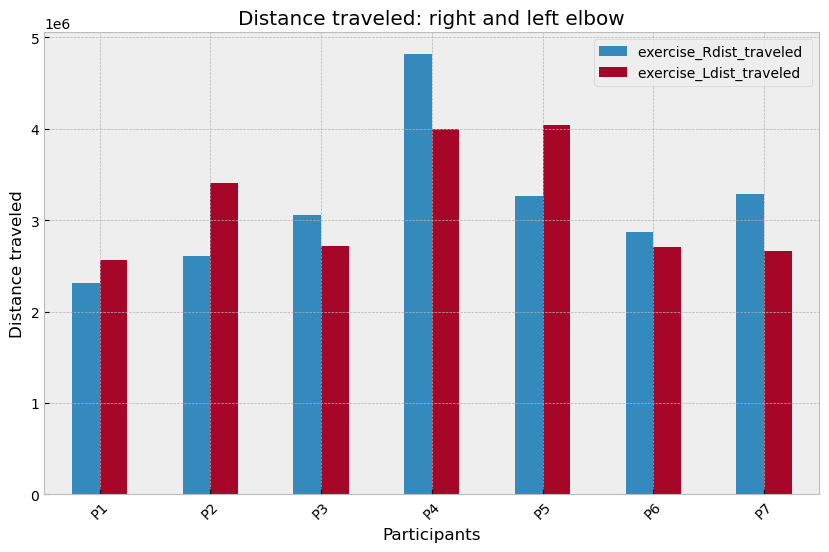

In [86]:
# Selecting only the columns for right and left distance traveled
distance_data = project_data[['participant', 'exercise_Rdist_traveled ', 'exercise_Ldist_traveled ']]

# Setting the index to 'participant' for easier plotting
distance_data.set_index('participant', inplace=True)

# Plotting the data
distance_data.plot(kind='bar', figsize=(10, 6))
plt.style.use('bmh')
# Adding labels and title
plt.xlabel('Participants')
plt.ylabel('Distance traveled')
plt.title('Distance traveled: right and left elbow')
plt.xticks(rotation=45)

# Show the plot
plt.show()


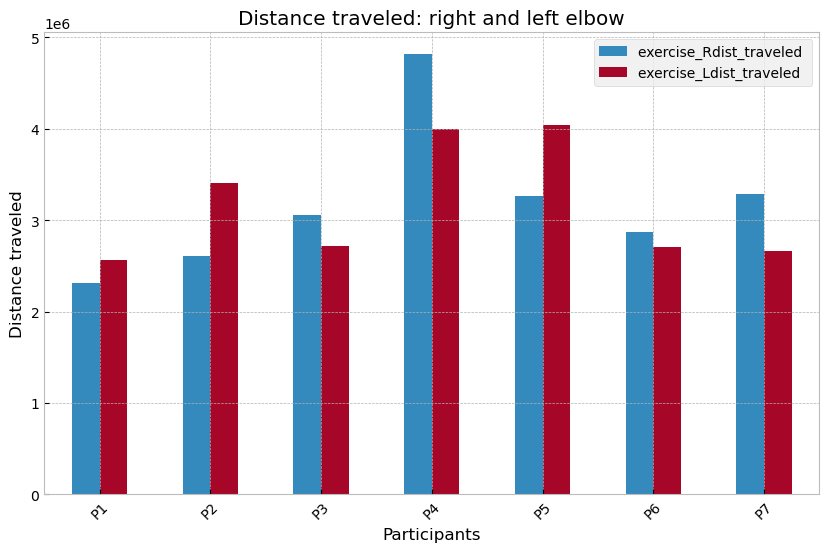

In [89]:
# Selecting only the columns for right and left distance traveled
distance_data = project_data[['participant', 'exercise_Rdist_traveled ', 'exercise_Ldist_traveled ']]

# Setting the index to 'participant' for easier plotting
distance_data.set_index('participant', inplace=True)

# Plotting the data
plt.style.use('bmh')  # Using the 'bmh' style
fig, ax = plt.subplots(figsize=(10, 6))
distance_data.plot(kind='bar', ax=ax)

# Setting the background color to white
fig.set_facecolor('white')
ax.set_facecolor('white')

# Adding labels and title
plt.xlabel('Participants')
plt.ylabel('Distance traveled')
plt.title('Distance traveled: right and left elbow')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [22]:
 plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']